# Student Attendance

This student attendance program displays the attendance percentage of a student the user or tutor chooses to view. It shows a dataframe of each module on the valid weeks by performing the following functions:
- reads module attendance and attendance details from the database
- calculates the percentage attendance for each student
- merges the dataframe from all modules
- plots a grouped bar chart of a student's attendance for both modules

## Imports

In [10]:
#required modules for Student_Att code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

## Functions

### Calculate each student attendance score

In [11]:
def get_attendance_table_from_db(Mod): 
    '''
    read db 
    returns module attendance record as a dataframe
    Mod is a attendance table name, string type
    '''
    conn = sqlite3.connect('C:\\Users\\rolli\\CW\\cop504cwdata\\CWDatabase.db')
    dfModuleAtt = pd.read_sql('''select * from %s
                            ''' %(Mod),con=conn).set_index('sessions_id') 
    dfModuleAtt.index = dfModuleAtt.index.astype(int)
    conn.close()

    return dfModuleAtt

def get_attendance_details_from_db(dfSess):
    '''
    read db
    input:
        dfSess: table name, string type
    returns the week column from attendance details table as a dataframe
    '''
    conn = sqlite3.connect('C:\\Users\\rolli\\CW\\cop504cwdata\\CWDatabase.db')
    dfSessDetails = pd.read_sql('''select week from %s'''%(dfSess),
                           con=conn)
    conn.close()
    return dfSessDetails

def get_weekly_mod_attendance_from_db(Mod, dfSess,num):
    '''
    returns the weekly-attendance-percentage of a student for one module, dataframe type
    input:
        Mod: the module attendance, dataframe 
        dfSess: the attendance details, dataframe
        num:student id, string type   
    output:
        dfMerge: concatenate attedance for each student, dataframe
    '''
    dfModMerge = pd.concat([Mod,dfSess], axis=1)
    dfMerge_1 = dfModMerge.groupby('week')[[num]].count()
    dfMerge_2 = dfModMerge.groupby('week')[[num]].sum()
    dfMerge = pd.concat([dfMerge_1, dfMerge_2], axis=1)
    dfMerge['attendance'] = dfMerge.iloc[:, 1]*100.0/dfMerge.iloc[:, 0]
    dfMerge = dfMerge[['attendance']].copy()
    dfMerge.columns = [num]
    
    return dfMerge

def get_student_attendance(dftwo,dfone):
    '''
    returns the weekly-attendance-percentage of a student for all modules, dataframe
    input:
        dfone is a dataframe data type
        dftwo is a dataframe data type
    '''
    StuAtt = pd.concat([dfone, dftwo],axis=1)
    StuAtt.reset_index(inplace=True)
    StuAtt.columns = ["week_no","COA122%", "COA111%"]
    StuAtt=StuAtt.round(0)
    
    return StuAtt


def get_student_attendance_chart(plotdata_df,dfName2,dfName1):
    '''
    input:
        plotdata_df: weekly attendance dataframe to plot
        dfName, dfName2: names of each module, string type
    returns a plot of the weekly-attendance-percentage of a student for all modules
    '''
    plotdata_df.reset_index().plot(
    x="week_no", y=[dfName2, dfName1], kind="bar")
    plt.title("Total Student Attendance Score per Week")
    plt.xlabel("week_no")
    plt.ylabel("attendance_score")
    plt.show()

## Main Code

In [12]:
def student_att(student_id):
    '''
    main function of the student attendance code 
    
    '''
    modules_list = ["COA111", "COA122"]
    att_list = []
    for mod in modules_list:
        dfMod = get_attendance_table_from_db(mod) # read attendance table from the database
        dfSess = get_attendance_details_from_db(mod+'_Sessions') # weekly student attendance for each module
        dfStuAt = get_weekly_mod_attendance_from_db(dfMod, dfSess,student_id)  # overall students weekly attendance %
        att_list.append(dfStuAt)
    df = get_student_attendance(att_list[1], att_list[0])
    display(df)
    dfBar = get_student_attendance_chart(df,"COA122%","COA111%")


# Test

In [13]:
# attendance dataframe
df1=get_attendance_table_from_db('COA111')
df2=get_attendance_table_from_db('COA122')
display(df1,df2)

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
sessions_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,...,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
10,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN


,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
sessions_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,...,1.0,1.0,1.0,0.0,0.0,NaN,NaN,1.0,NaN,0.0
3,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,NaN,NaN,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN
5,NaN,NaN,NaN,0.0,NaN,1.0,0.0,NaN,NaN,1.0,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
6,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,0.0,1.0,1.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,1.0,NaN
8,NaN,NaN,NaN,1.0,NaN,1.0,0.0,NaN,NaN,1.0,...,1.0,1.0,0.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN


In [14]:
# attendance details dataframe
dfSess1=get_attendance_details_from_db('COA111_Sessions')
dfSess2=get_attendance_details_from_db('COA122_Sessions')
display(dfSess1,dfSess2)

,week
0,1
1,1
2,2
3,2
4,2
5,3
6,3
7,3
8,4
9,4


,week
0,1
1,1
2,1
3,2
4,2
5,2
6,3
7,3
8,3
9,4


In [15]:
# join only week column from attendance details table to specified column from concurrent attendance table
dfStuA1=get_weekly_mod_attendance_from_db(df1, dfSess1,'199')
dfStuA2=get_weekly_mod_attendance_from_db(df2, dfSess2,'199')
display(dfStuA1,dfStuA2)

,199
week,
1,100.0
2,100.0
3,50.0
4,50.0
5,50.0


,199
week,
1,100.0
2,100.0
3,100.0
4,100.0
5,100.0
6,100.0


In [16]:
# concate the above dataframes on week and reset index
df=get_student_attendance(dfStuA2,dfStuA1)
display(df)

,week_no,COA122%,COA111%
0,1,100.0,100.0
1,2,100.0,100.0
2,3,50.0,100.0
3,4,50.0,100.0
4,5,50.0,100.0
5,6,NaN,100.0


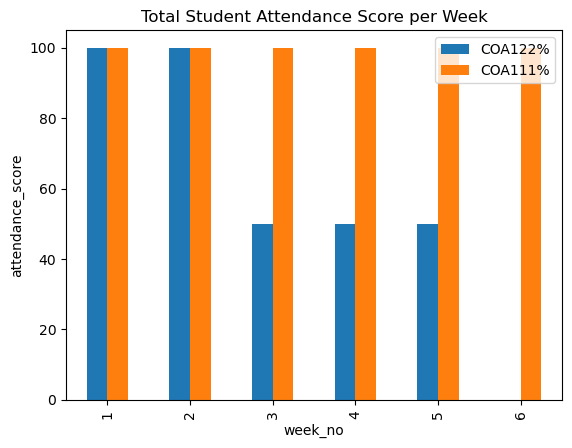

In [17]:
df_plot = get_student_attendance_chart(df, "COA122%", "COA111%")
df_plot

,week_no,COA122%,COA111%
0,1,100.0,100.0
1,2,50.0,100.0
2,3,100.0,100.0
3,4,100.0,100.0
4,5,0.0,50.0
5,6,NaN,100.0


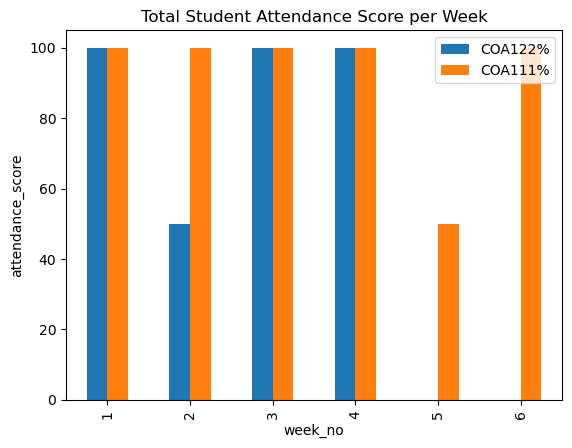

In [18]:
a=student_att('233')
a